In [12]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

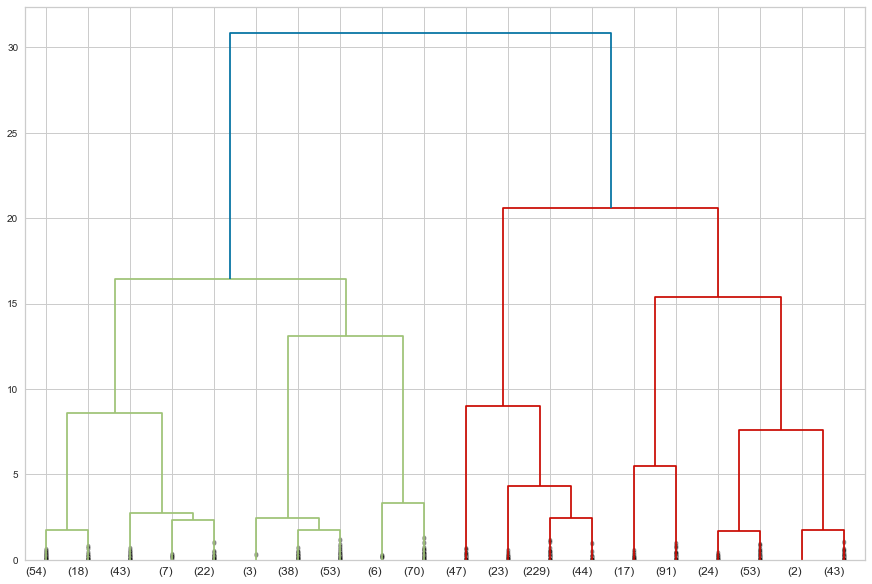

In [6]:
fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
plt.xticks(ha='right')

X_norm_dend =  linkage(titanic_mms, method="ward")
dend = dendrogram(X_norm_dend,
                  truncate_mode="lastp",
                  p=20,
                  show_contracted=True,
)

plt.show()
fig.savefig("hierarchy_titanic_normalized.png", dpi=300)

In [3]:
dend_cluster = fcluster(X_norm_dend,10,'maxclust')

fcluster_data_unique = pd.DataFrame(np.transpose(np.unique(dend_cluster, return_counts=True)), 
                   columns=["cluster_id","unique_obs"])

fcluster_data_unique

,cluster_id,unique_obs
0,1,72
1,2,72
2,3,94
3,4,76
4,5,47
5,6,296
6,7,17
7,8,91
8,9,77
9,10,45


In [4]:
titanic_fcluster = pd.concat([fcluster_data_unique,titanic_ohe ], axis=1).groupby(['cluster_id']).mean().round(3)
                            
titanic_fcluster

,unique_obs,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
cluster_id,,,,,,,,,
1.0,72.0,0,3,22.0,1,0,7.250,0,1
2.0,72.0,1,1,38.0,1,0,71.283,1,0
3.0,94.0,1,3,26.0,0,0,7.925,1,0
4.0,76.0,1,1,35.0,1,0,53.100,1,0
5.0,47.0,0,3,35.0,0,0,8.050,0,1
6.0,296.0,0,3,27.0,0,0,8.458,0,1
7.0,17.0,0,1,54.0,0,0,51.862,0,1
8.0,91.0,0,3,2.0,3,1,21.075,0,1
9.0,77.0,1,3,27.0,0,2,11.133,1,0
